# 6899.达到末尾下标所需的最大跳跃次数

本笔记包含力扣题目 [6899.达到末尾下标所需的最大跳跃次数](https://leetcode.cn/contest/weekly-contest-353/problems/maximum-number-of-jumps-to-reach-the-last-index/) 的求解动画演示代码。

### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://zjl9959.github.io/algviz/) 渲染，环境配置请参考该链接：[https://zjl9959.github.io/algviz/cn/installation.html](https://zjl9959.github.io/algviz/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

## 思路

这题和 [跳跃游戏](https://leetcode.cn/problemset/all/?page=1&search=%E8%B7%B3%E8%B7%83%E6%B8%B8%E6%88%8F) 系列问题有点类似，尝试使用深度优先搜索，寻找所有可行路径；

In [2]:
class Solution:
    def maximumJumps(self, nums, target):
        self.nums = nums
        self.target = target
        return self.dfs(0)
    
    def dfs(self, i):
        if i == len(self.nums) - 1:
            return 0
        res = -1
        for j in range(i + 1, len(self.nums)):
            diff = self.nums[j] - self.nums[i]
            if diff >= -self.target and diff <= self.target:
                res = max(res, self.dfs(j))
        return -1 if res == -1 else res + 1

可惜的是，上面的代码超时了，因为 dfs 的复杂度是阶乘级别的，而题目中 `nums` 的长度最大是 1000，所以需要对算法的时间复杂度进行优化。

分析可以发现，dfs 处理的子问题有重叠的部分，可以记录 `nums[i:]` 段子问题的结果，然后在求解 `dfs(i)` 时先查表。

In [ ]:
class Solution:
    def maximumJumps(self, nums, target):
        self.nums = nums
        self.target = target
        self.dp = [None for i in range(len(self.nums))]
        self.dp[len(self.nums)-1] = 0
        return self.dfs(0)
    
    def dfs(self, i):
        if i == len(self.nums) - 1:
            return 0
        if self.dp[i] is not None:
            return self.dp[i]
        res = -1
        for j in range(i + 1, len(self.nums)):
            diff = self.nums[j] - self.nums[i]
            if diff >= -self.target and diff <= self.target:
                res = max(res, self.dfs(j))
        res = -1 if res == -1 else res + 1
        self.dp[i] = res
        return res

上面的代码顺利通过测试，让我们看一下它是如何运行的。

In [39]:
import algviz

class Solution:
    def maximumJumps(self, nums, target):
        self.viz = algviz.Visualizer(layout=True)
        self.nums = self.viz.createVector(nums, 'nums')
        self.recursive = algviz.RecursiveTree(self.viz, '递归层次-搜索起点')
        self.log = self.viz.createLogger(15, name='运行日志')
        self.i = self.viz.createCursor(0, 'i')
        self.j = self.viz.createCursor(0, 'j')
        self.nums[self.i]; self.nums[self.j]
        self.target = target
        dp = [None for i in range(len(self.nums))]
        self.dp = self.viz.createVector(dp, '记忆表-到终点最多跳几步')
        self.dp[len(self.nums)-1] = 0
        self.viz.display()
        self.recursive.forward(0)
        res = self.dfs(0)
        self.recursive.backward('{}={}'.format(0, res))
        self.viz.display(delay=2)
        self.viz.layout()
        return res
    
    def dfs(self, i):
        self.i << i
        self.log.write('递归调用 dfs({})'.format(i))
        self.viz.display()
        if i == len(self.nums) - 1:
            return 0
        if self.dp[i] is not None:
            self.dp.mark(algviz.color_gold, i)
            self.log.write('查询记忆表得到 dfs({}) 的结果为：{}'.format(i, self.dp[i]))
            self.viz.display()
            return self.dp[i]
        res = -1
        for j in range(i + 1, len(self.nums)):
            self.j << j
            diff = self.nums[j] - self.nums[i]
            self.log.write('计算 -{} <= {} - {} <= {} ？'.format(
                self.target, self.nums[j], self.nums[i], self.target))
            self.viz.display()
            if diff >= -self.target and diff <= self.target:
                self.nums.mark(algviz.color_green, j)
                self.recursive.forward(str(j))
                self.log.write('正确')
                self.viz.display()
                res = max(res, self.dfs(j))
                self.i << i
                self.log.write('调用 dfs({}) 的返回值为 {}'.format(j, res))
                self.recursive.backward('{}={}'.format(j, res))
                self.viz.display()
            else:
                self.nums.mark(algviz.color_dark_red, j)
                self.log.write('错误')
                self.viz.display()
        res = -1 if res == -1 else res + 1
        self.dp[i] = res
        return res

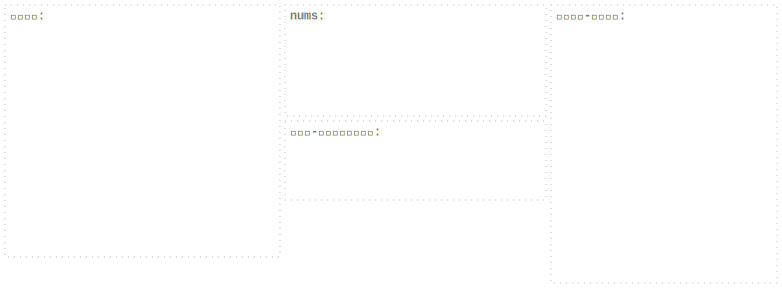

3

In [40]:
nums = [1,3,6,4,1,2]
target = 2
Solution().maximumJumps(nums, target)